In [1]:
# autoreload
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys

import pathmagic
from tools.project import proj_dir

In [2]:
import json

data_path = proj_dir("datasets", "dining_room_info")

with open(os.path.join(data_path, "stats_per_frame.json"), "r") as f:
    stats_per_frame = json.load(f)

with open(os.path.join(data_path, "stats_per_clip.json"), "r") as f:
    stats_per_clip = json.load(f)
    
with open(os.path.join(data_path, "stats_total.json"), "r") as f:
    stats_total = json.load(f)

In [25]:
import numpy as np

depth_values = {"min": [], "avg": [], "max": []}
flow_values = {"min": [], "avg": [], "max": []}
flow_nonzero_values = []

for clip in stats_per_frame:
    for frame in clip["frames"]:
        for x in ["min", "avg", "max"]:
            depth_values[x].append(frame["depth"][x] / 0xffff * 10)
            flow_values[x].append(frame["flow"][x])
        
for clip in stats_per_clip:
    flow_nonzero_values.append(clip["frames"]["flow"]["nonzero_per"])
    
#depth_values = np.array(depth_values)
#flow_values = np.array(flow_values)
#flow_nonzero_values = np.array(flow_nonzero_values)

(array([1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+01, 4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.500e+01, 1.400e+01,
        1.000e+00, 3.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        2.000e+00, 2.700e+01, 3.800e+01, 7.700e+01, 1.910e+02, 2.010e+02,
        1.830e+02, 3.310e+02, 5.240e+02, 4.950e+02, 5.840e+02, 7.050e+02,
        1.810e+03, 6.480e+02, 1.418e+03, 7.080e+02, 6.810e+02, 7.770e+02,
        1.550e+03, 1.491e+03, 8.180e+02, 1.073e+03, 1.128e+03, 1.079e+03,
        3.470e+02, 2.001e+03]),
 array([2.88090333, 2.96226749, 3.04363165, 3.1249958 , 3.20635996,
        3.28772412, 3.36908827, 3.45045243, 3.53181659, 3.61318074,
        3.6945449 , 3.77590906, 3.85727321, 3.93863737, 4.02000153,
        4.10136568, 4.18272984, 4.264094  , 4.34545815, 4.42682231,
        4.50818647, 4.58955062, 4.67091478, 4.75227893, 4.83364309,
        4.91500725, 4.9963714 , 5.07

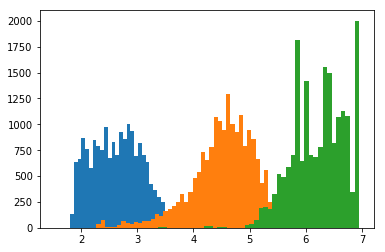

In [31]:
import matplotlib.pyplot as plt

plt.hist(depth_values["min"], bins=50)
plt.hist(depth_values["avg"], bins=50)
plt.hist(depth_values["max"], bins=50)